## **Análisis Exploratorio de Datos (EDA)**

In [1]:
# Tratamiento de datos
# -----------------------------------------------------------------------
import numpy as np
import pandas as pd

# Otros objetivos
# -----------------------------------------------------------------------
import math

# Gráficos
# -----------------------------------------------------------------------
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.impute import KNNImputer
from sklearn.ensemble import RandomForestRegressor

import sys
import os
import warnings
warnings.filterwarnings('ignore')

sys.path.append(os.path.abspath('../'))
from src import funciones_eda as fs
from src import funciones_gestion_nulos as fgn

In [2]:
df = pd.read_csv("../datos/api_rent_madrid.csv", sep=";")

print(df.shape)
df.head()

(450, 38)


,propertyCode,numPhotos,price,propertyType,operation,size,exterior,rooms,bathrooms,address,...,superTopHighlight,topNewDevelopment,externalReference,floor,district,neighborhood,hasLift,parkingSpace,labels,newDevelopmentFinished
0,98903350,33,550.0,chalet,rent,371.0,False,6,3,Numancia de la Sagra,...,False,False,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,91615378,12,750.0,flat,rent,60.0,True,1,1,"Calle de Alejandro Villegas, 23",...,False,False,AV23,3,Hortaleza,Canillas,True,NaN,NaN,NaN
2,88363329,21,750.0,flat,rent,70.0,True,2,1,Gregorio izquierdo,...,False,False,NaN,bj,Centro Urbano,NaN,False,NaN,NaN,NaN
3,98621753,28,400.0,penthouse,rent,67.0,True,2,2,Calle Madrid,...,False,False,90004,2,NaN,NaN,False,NaN,NaN,NaN
4,98222714,22,450.0,flat,rent,89.0,False,2,1,Calle Arroyo,...,False,False,RP1882022101719,2,NaN,NaN,True,"{'hasParkingSpace': True, 'isParkingSpaceInclu...",NaN,NaN


In [3]:
df["floor"].unique()

array([nan, '3', 'bj', '2', '1', '5', 'en', '4', 'st', '8', '7', '6',
       '14', 'ss'], dtype=object)

In [3]:
fs.exploracion_dataframe(df)

El número de datos es 450 y el de columnas es 38

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 8

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
description,0.222222
hasVideo,4.000000
status,4.000000
newDevelopment,4.000000
priceByArea,4.000000
detailedType,4.000000
suggestedTexts,4.000000
hasPlan,4.000000
has3DTour,4.000000
has360,4.000000



 ..................... 

Los tipos de las columnas son:


,tipo_dato
propertyCode,int64
numPhotos,int64
price,float64
propertyType,object
operation,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
address,object



 ..................... 



,count,mean,std,min,25%,50%,75%,max
propertyCode,450.0,9.463515e+07,1.385817e+07,666696.0,97564945.50,98660320.5,98894324.25,98939685.0
numPhotos,450.0,2.190000e+01,9.670346e+00,0.0,15.00,21.0,28.00,72.0
price,450.0,6.717978e+02,8.510060e+01,340.0,640.00,700.0,740.00,750.0
size,450.0,6.823778e+01,3.566256e+01,20.0,47.25,62.0,80.00,371.0
rooms,450.0,1.700000e+00,9.700412e-01,0.0,1.00,2.0,2.00,6.0
bathrooms,450.0,1.213333e+00,4.414998e-01,1.0,1.00,1.0,1.00,3.0
distance,450.0,2.245577e+04,1.700169e+04,183.0,7104.25,20294.0,34979.75,59919.0
priceByArea,432.0,1.186343e+01,5.360971e+00,1.0,8.00,11.0,15.00,33.0



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene las siguientes valore únicos:


,count
propertyType,
flat,356
studio,48
duplex,19
penthouse,16
chalet,9


La columna OPERATION tiene las siguientes valore únicos:


,count
operation,
rent,450


La columna ADDRESS tiene las siguientes valore únicos:


,count
address,
"Calle Valle de Ambles, 2",10
El Quiñón,4
Calle de Sáhara,3
Calle de Honduras,3
Calle de Navalmoral de la Mata,2


La columna PROVINCE tiene las siguientes valore únicos:


,count
province,
Madrid,358
Toledo,62
Guadalajara,21
Segovia,8
Ávila,1


La columna MUNICIPALITY tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,23
Seseña,14
Torrejón de Ardoz,14
Parla,14


La columna COUNTRY tiene las siguientes valore únicos:


,count
country,
es,450


La columna LATITUDE tiene las siguientes valore únicos:


,count
latitude,
404.430.651,10
403.809.876,2
402.003.307,2
405.126.166,2
400.493.725,2


La columna LONGITUDE tiene las siguientes valore únicos:


,count
longitude,
-34.659.877,10
-36.338.528,2
-36.919.489,2
-33.694.194,2
-42.105.716,2


La columna DESCRIPTION tiene las siguientes valore únicos:


,count
description,
"VIVIENDA NUEVA PARA ALQUILER ¡Estrena hogar con Qube! Alquila tu nueva casa en Torrejón de Ardoz SIN GASTOS DE AGENCIA, NI COMISIONES. Qube Torrejón es un residencial de obra nueva ubicado en Torrejón de Ardoz compuesto por 36 viviendas de Protección de Precio Limitado. Todas las viviendas cuentan con 2 dormitorios, 2 baños, trastero y 1 o 2 plazas de garaje incluido en el precio. El Precio NO incluye los gastos de comunidad, tasas e impuestos vinculados a la vivienda. El edificio cuenta con ascensor, servicio de conserjería, zonas comunes con piscina en mancomunidad, zona chill out en cubierta y sala gastrobar para que toda la familia pueda disfrutar de todas las comodidades que presentan las comunidades Qube. Las viviendas Qube llevan suelo radiante refrescante centralizado mediante aerotermia. Además, cuentan con la mayor calificación energética A con lo que se reduce el consumo energético y lo podrás comprobar en la factura de los consumos. Todos los pisos tienen cocina amueblada equipada con vitrocerámica de inducción, campana decorativa y horno. Los cuartos de baño cuentan con ducha y bañera, mampara, accesorios de baño, espejo y mueble. El resto de la vivienda no está amueblado. Además, las viviendas están dotadas de luminarias en la totalidad de las estancias. ¿Qué necesitas para poder disfrutar de una vivienda Qube? 1 mes de fianza Seguro de hogar a la firma de contrato. Contrato indefinido de más de 1 año de antigüedad. Si no cumples con esta condición se requerirá un avalista adicional. ¡IMPORTANTE! Qube Torrejón es una promoción de “Protección de Precio Limitado en Régimen de Alquiler”, por el decreto 74/2009, podrás optar por el piso que más te guste si cumples los requisitos de acceso de la Comunidad de Madrid, incluido uno de los disponibles adaptado para personas con movilidad que presenten su certificado de discapacidad. Si tienes cualquier duda acerca de las condiciones puedes visitar nuestra web o llamarnos, te responderemos encantados.",10
"Nuevo curso, nuevo hogar ¡con hasta 1 MES GRATIS y SIN COMISIÓN DE AGENCIA en tu alquiler! Amplia y luminosa vivienda de dos dormitorios, en un entorno tranquilo, con todos los servicios a tu alcance. *Es condición esencial permanecer en la vivienda al menos 12 meses, de no ser así la promoción quedará sin efectos con carácter retroactivo, viniendo obligado a devolver los importes mensuales de la promoción que se haya beneficiado ¡ALTA DE SUMINISTROS GRATIS! Disfruta de tu hogar desde el primer momento, Testa Home te ayuda en la gestión del alta de suministros de manera gratuita, con lo que podrás ahorrar hasta 330 € por el alta de la luz y el gas. *Para una vivienda con gasto promedio de 4,4 KWh ¡VIVIENDA DE DOS DORMITORIOS CON TERRAZA! Vivienda sin amueblar. Vivienda de dos dormitorios situado en Seseña, Toledo. Cocina amueblada con electrodomésticos. Suelos de tarima y armarios empotrados. Plaza de garaje y trastero incluidos en el precio. Posibilidad de alquiler de una segunda plaza de garaje por 40 euros mensuales para las viviendas sitas en Calle Rembrant. Situado en una urbanización compuesta por varios edificios que conforman una manzana semicerrada, con zonas mancomunadas. Disponen de jardines, piscina comunitaria, canchas deportivas en las que se pueden realizar varios tipos de deportes, zonas de juegos infantiles, además de accesos a garajes. Situado en un entorno tranquilo y con todos los servicios. Bien comunicado con transporte público autobús urbano y salidas a la A4 Y R4. ¡SÓLO SE PIDE 1 MES DE FIANZA Y ¡SIN COMISIÓN DE AGENCIA! No pagas los gastos de comunidad durante los primeros 3 años e IBI durante los primeros 2 años. Horario de atención telefónica de lunes a viernes de 9:00 a 21:00 y sábados de 9:00 a 14:00 horas. Consulte condiciones y disponibilidad. *Imágenes orientativas sin carácter vinculante. **Las imágenes corresponden a un apartamento tipo. **Viviendas sujetas a disponibilidad y viviendas no amueblada. Las promociones d

La columna HASVIDEO tiene las siguientes valore únicos:


,count
hasVideo,
False,314
True,118


La columna STATUS tiene las siguientes valore únicos:


,count
status,
good,413
newdevelopment,17
renew,2


La columna NEWDEVELOPMENT tiene las siguientes valore únicos:


,count
newDevelopment,
False,415
True,17


La columna DETAILEDTYPE tiene las siguientes valore únicos:


,count
detailedType,
{'typology': 'flat'},344
"{'typology': 'flat', 'subTypology': 'studio'}",46
"{'typology': 'flat', 'subTypology': 'penthouse'}",16
"{'typology': 'flat', 'subTypology': 'duplex'}",15
"{'typology': 'chalet', 'subTypology': 'terracedHouse'}",5


La columna SUGGESTEDTEXTS tiene las siguientes valore únicos:


,count
suggestedTexts,
"{'subtitle': 'Suroeste, Torrejón de Ardoz', 'title': 'Piso en Calle Valle de Ambles, 2'}",10
"{'subtitle': 'El Quiñón, Seseña', 'title': 'Piso'}",4
"{'subtitle': 'Los Rosales, Madrid', 'title': 'Piso en Calle de Sáhara'}",3
"{'subtitle': 'Las Sedas - El Olivar, Alcalá de Henares', 'title': 'Piso en Calle de Honduras'}",3
"{'subtitle': 'Cabañas de la Sagra', 'title': 'Piso'}",2


La columna HASPLAN tiene las siguientes valore únicos:


,count
hasPlan,
False,296
True,136


La columna HAS3DTOUR tiene las siguientes valore únicos:


,count
has3DTour,
False,426
True,6


La columna HAS360 tiene las siguientes valore únicos:


,count
has360,
False,345
True,87


La columna HASSTAGING tiene las siguientes valore únicos:


,count
hasStaging,
False,432


La columna SUPERTOPHIGHLIGHT tiene las siguientes valore únicos:


,count
superTopHighlight,
False,432


La columna TOPNEWDEVELOPMENT tiene las siguientes valore únicos:


,count
topNewDevelopment,
False,432


La columna EXTERNALREFERENCE tiene las siguientes valore únicos:


,count
externalReference,
CG-91792-0001,2
"3,80811E+11",2
VT02,2
VT07,2
VT3,2


La columna FLOOR tiene las siguientes valore únicos:


,count
floor,
1,95
2,77
bj,68
3,60
4,36


La columna DISTRICT tiene las siguientes valore únicos:


,count
district,
Centro,48
Villaverde,23
Puente de Vallecas,17
El Quiñón,13
Tetuán,13


La columna NEIGHBORHOOD tiene las siguientes valore únicos:


,count
neighborhood,
Lavapiés-Embajadores,11
Villaverde Alto,9
Valdeacederas,8
San Diego,8
Los Rosales,7


La columna HASLIFT tiene las siguientes valore únicos:


,count
hasLift,
True,234
False,185


La columna PARKINGSPACE tiene las siguientes valore únicos:


,count
parkingSpace,
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': True}",136
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 50.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 40.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 90.0}",1
"{'hasParkingSpace': True, 'isParkingSpaceIncludedInPrice': False, 'parkingSpacePrice': 15000.0}",1


La columna LABELS tiene las siguientes valore únicos:


,count
labels,
"[{'name': 'apartamentoType', 'text': 'Apartamento'}]",30


La columna NEWDEVELOPMENTFINISHED tiene las siguientes valore únicos:


,count
newDevelopmentFinished,
True,12
False,5


- Tenemos 8 duplicados que hay que eliminar
- Hay 38 columnas, no nos vamos a quedar con todas ya que para que nuestro mejor prediga lo mejor posible elegiremos aquellas columnas que tenga una verdadera relevancia a la hora de predecir el precio.
- En cuanto a nulos tenemos varias columnas que tienen bastante nulos y habrá que pensar como gestionarlos o si las columnas no son decisivas a la hora de predecir el precio eliminarlas.

- Variables numéricas:
El precio que es nuestra VR es mu importante que la conozcamos, podemos ver que el ranfo de los precios va desde 340 hasta 740 el cual no es un rango demasiado amplio por lo que de primeras no parece que vaya a haber muchos outliers. La media es 671 y la mediana 700 por lo que no distan mucho una de otra. 

- Al menos 75% de las casas tienen un solo baño.

- La columna operation solo tiene el valor `rent` por lo que es una columna prescindible.

- El adress es demasiado específico por lo que también es prescindible a la hora de predecir.

- El country es siempre España por lo que podemos eliminar la columna `country`.

- Hay columnas que solo tienen un valor: `hasStaging`, `superTopHighlight`, `topNewDevelopment` .


Comenzamos a gestionar:

In [4]:
# Eliminamos duplicados
df.drop_duplicates(inplace=True)

# Eliminamos columnas que solo tienen un valor
df.drop(columns=["operation", "country", "hasStaging", "superTopHighlight", "topNewDevelopment"], inplace = True)

Elimiamos columnas que no nos van a servir de ayuda para predecir nuestro modelo:

- `propertyCode`: ya que el código de la casa no influye en el precio

- `numPhotos`, `hasVideo`: el número de fotos o si hay videos de la casa en el anuncio no va a hacer que la casa cueste más o menos.

- `address`: ya que la dirección de la casa es un dato demasiado específico que no aporta valor y ya tenemos otras columnas como barrio o vecindario donde es más facil agrupar casas con precios similares.

- `latitud` y `longitud`: vamos a prescindir de las coordenadas porque para predecir de nuevo son muy específicas y tenemos los barrios.

- `showAddress`: no nos importa si el anuncio muestra o no la dirección a la hora de predecir el precio.

- `description`: irrelevante para predecir.

- `status`: el 92.5% de los datos tienen el mismo valor por lo que considero que el impacto de esta columna no es tan relevante y podría hacer ruido en mi predicción por lo que prescindo de ella.

- `newDevelopment`: ocurre lo mismo, el 92% son False.

- `priceByArea`: esta columna debemos eliminarla ya que si la tuvieramos junto los metros de la casa las predicciones serían perfectas, este data a la hora de predecir no lo vamos a tener, por lo tanto también la eliminamos.

- `detailedType`, `suggestedTexts`: es demasiado detalle para el modelo de predicción por lo que de cara a evitar el overfitting eliminamos estas columnas.

- `hasPlan`, `has3DTour`, `has360`: datos del anuncio innecesarios para la predicción.

- `hasStaging`: todos los valores son false.

- `superTopHighlight`, `topNewDevelopment`, `externalReference`: métricas propias de la pletaforma.

- `parkingSpace`: el 68% de los datos de esta columna son nulos y generar artificialmente estos datos o rellenarlos con una categoría que no aporta valor solo va a hacer ruido a nuestro modelo.

- `labels`, `newDevelopmentFinished`: lo mismo que en el anterior, hay un 93% y 96% de nulos.

- Observando las columnas de `district` y `neighborhood` hemos observado que neighborhood tiene un 50% de nulos y district un 25%. Además se supone que dentro de cada distrito deberías haber varios barrios, sin embargo, hay 83 distritos distintos y 74 barrios distintos, lo cual indica que falta una gran catidad de datos. Al tener tan solo unos 400 registros y tampoco querer ser demasiado detallistas para evitar el overfitting eliminamos ambas columnas y mantenemos la de municipality ya que no tienen nulos y es más general.


In [5]:
df.drop(columns=["propertyCode", "numPhotos", "address", "latitude", "longitude", "showAddress", "hasVideo", "description", "status", "newDevelopment", "priceByArea", "detailedType", "suggestedTexts", "hasPlan", "has3DTour", "has360", "externalReference", "parkingSpace", "labels", "newDevelopmentFinished", "neighborhood", "district"], inplace = True)

In [6]:
#df["municipality"].value_counts(dropna=False)/df.shape[0]*100

Como queremos predecir precios para casasa de madrid y es el grueso de los datos vamos a quedarnos solo con esas casas:

In [7]:
df = df[df["province"]=="Madrid"]
df_madrid = df.drop(columns=["province"]).reset_index(drop=True)

In [8]:
df_madrid.head(1)

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,flat,60.0,True,1,1,Madrid,7037,3,True


Volvemos a hacer un estudio habiendo hecho la primera gran limpieza:

In [9]:
fs.exploracion_dataframe(df_madrid)

El número de datos es 353 y el de columnas es 10

 ..................... 

Los duplicados que tenemos en el conjunto de datos son: 1

 ..................... 

Los nulos que tenemos en el conjunto de datos son:


,%_nulos
floor,17.847025
hasLift,5.099150



 ..................... 

Los tipos de las columnas son:


,tipo_dato
price,float64
propertyType,object
size,float64
exterior,bool
rooms,int64
bathrooms,int64
municipality,object
distance,int64
floor,object
hasLift,object



 ..................... 



,count,mean,std,min,25%,50%,75%,max
price,353.0,692.932011,61.307820,400.0,650.0,700.0,740.0,750.0
size,353.0,59.728045,23.799745,20.0,45.0,57.0,70.0,206.0
rooms,353.0,1.543909,0.934760,0.0,1.0,2.0,2.0,4.0
bathrooms,353.0,1.110482,0.322857,1.0,1.0,1.0,1.0,3.0
distance,353.0,16698.824363,13549.504221,183.0,5656.0,12321.0,26558.0,56596.0



 ..................... 

Los valores que tenemos para las columnas categóricas son: 
La columna PROPERTYTYPE tiene las siguientes valore únicos:


,count
propertyType,
flat,277
studio,48
duplex,14
penthouse,10
chalet,3


La columna MUNICIPALITY tiene las siguientes valore únicos:


,count
municipality,
Madrid,170
Alcalá de Henares,22
Parla,14
Torrejón de Ardoz,11
Aranjuez,11


La columna FLOOR tiene las siguientes valore únicos:


,count
floor,
1,70
bj,58
2,56
3,48
4,33


La columna HASLIFT tiene las siguientes valore únicos:


,count
hasLift,
True,174
False,161


In [10]:
# Eliminamos los nulos
df_madrid.drop_duplicates(inplace=True)
df_madrid.reset_index(inplace=True, drop=True)

# Cambiamos las habitaciones y los baños a categóricas ya que se comportan como tal
df_madrid[["rooms", "bathrooms", "exterior"]] = df_madrid[["rooms", "bathrooms", "exterior"]].astype("str")

In [11]:
df_madrid

,price,propertyType,size,exterior,rooms,bathrooms,municipality,distance,floor,hasLift
0,750.0,flat,60.0,True,1,1,Madrid,7037,3,True
1,750.0,flat,70.0,True,2,1,San Sebastián de los Reyes,16145,bj,False
2,400.0,penthouse,67.0,True,2,2,Villamanrique de Tajo,55041,2,False
3,590.0,flat,70.0,True,3,2,Rascafría,56596,NaN,False
4,684.0,studio,45.0,True,0,1,Madrid,10656,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
347,640.0,flat,69.0,True,2,1,Villalbilla,29311,2,True
348,700.0,flat,54.0,True,1,1,Getafe,11656,1,True
349,700.0,flat,59.0,True,1,1,Madrid,7529,6,True
350,700.0,flat,75.0,True,2,1,Alcalá de Henares,30359,1,False


### 1. Visualizar numéricas y categóricas.

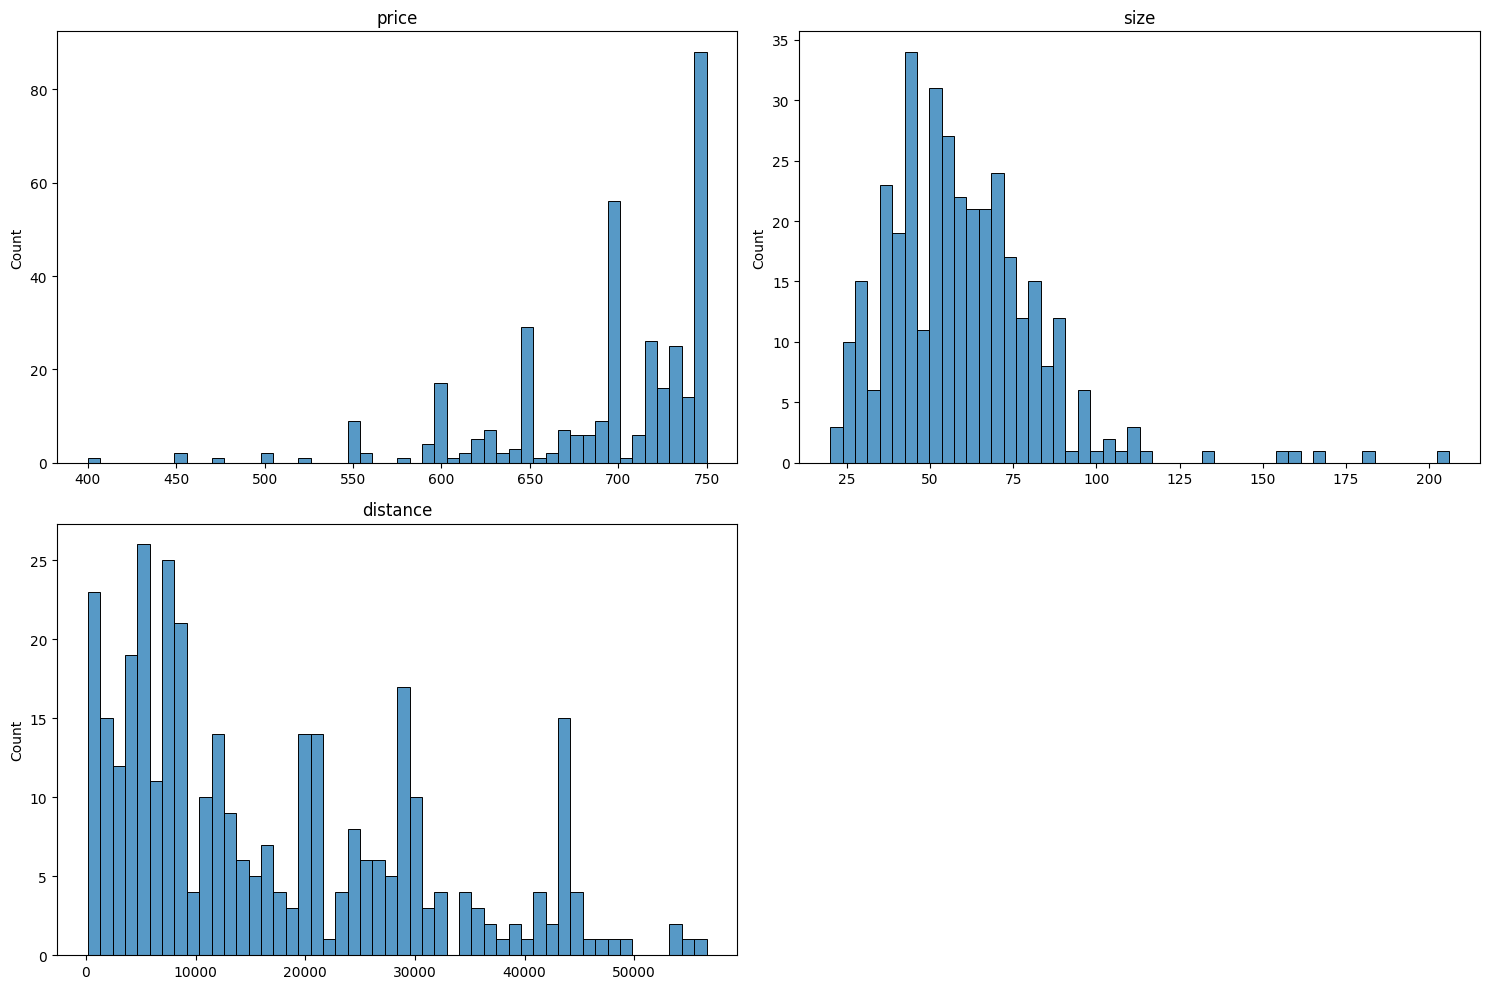

In [12]:
df_num, df_cat = fs.separar_df(df_madrid)
fs.plot_numericas(df_num)

La mayor parte de las casas cuestan más de 500 euros y como máximo 750, tienen entre 25 y 100 metros cuadrados y en cuanto a distancia al centro tiende a haber menos cuanto más nos alejamos.

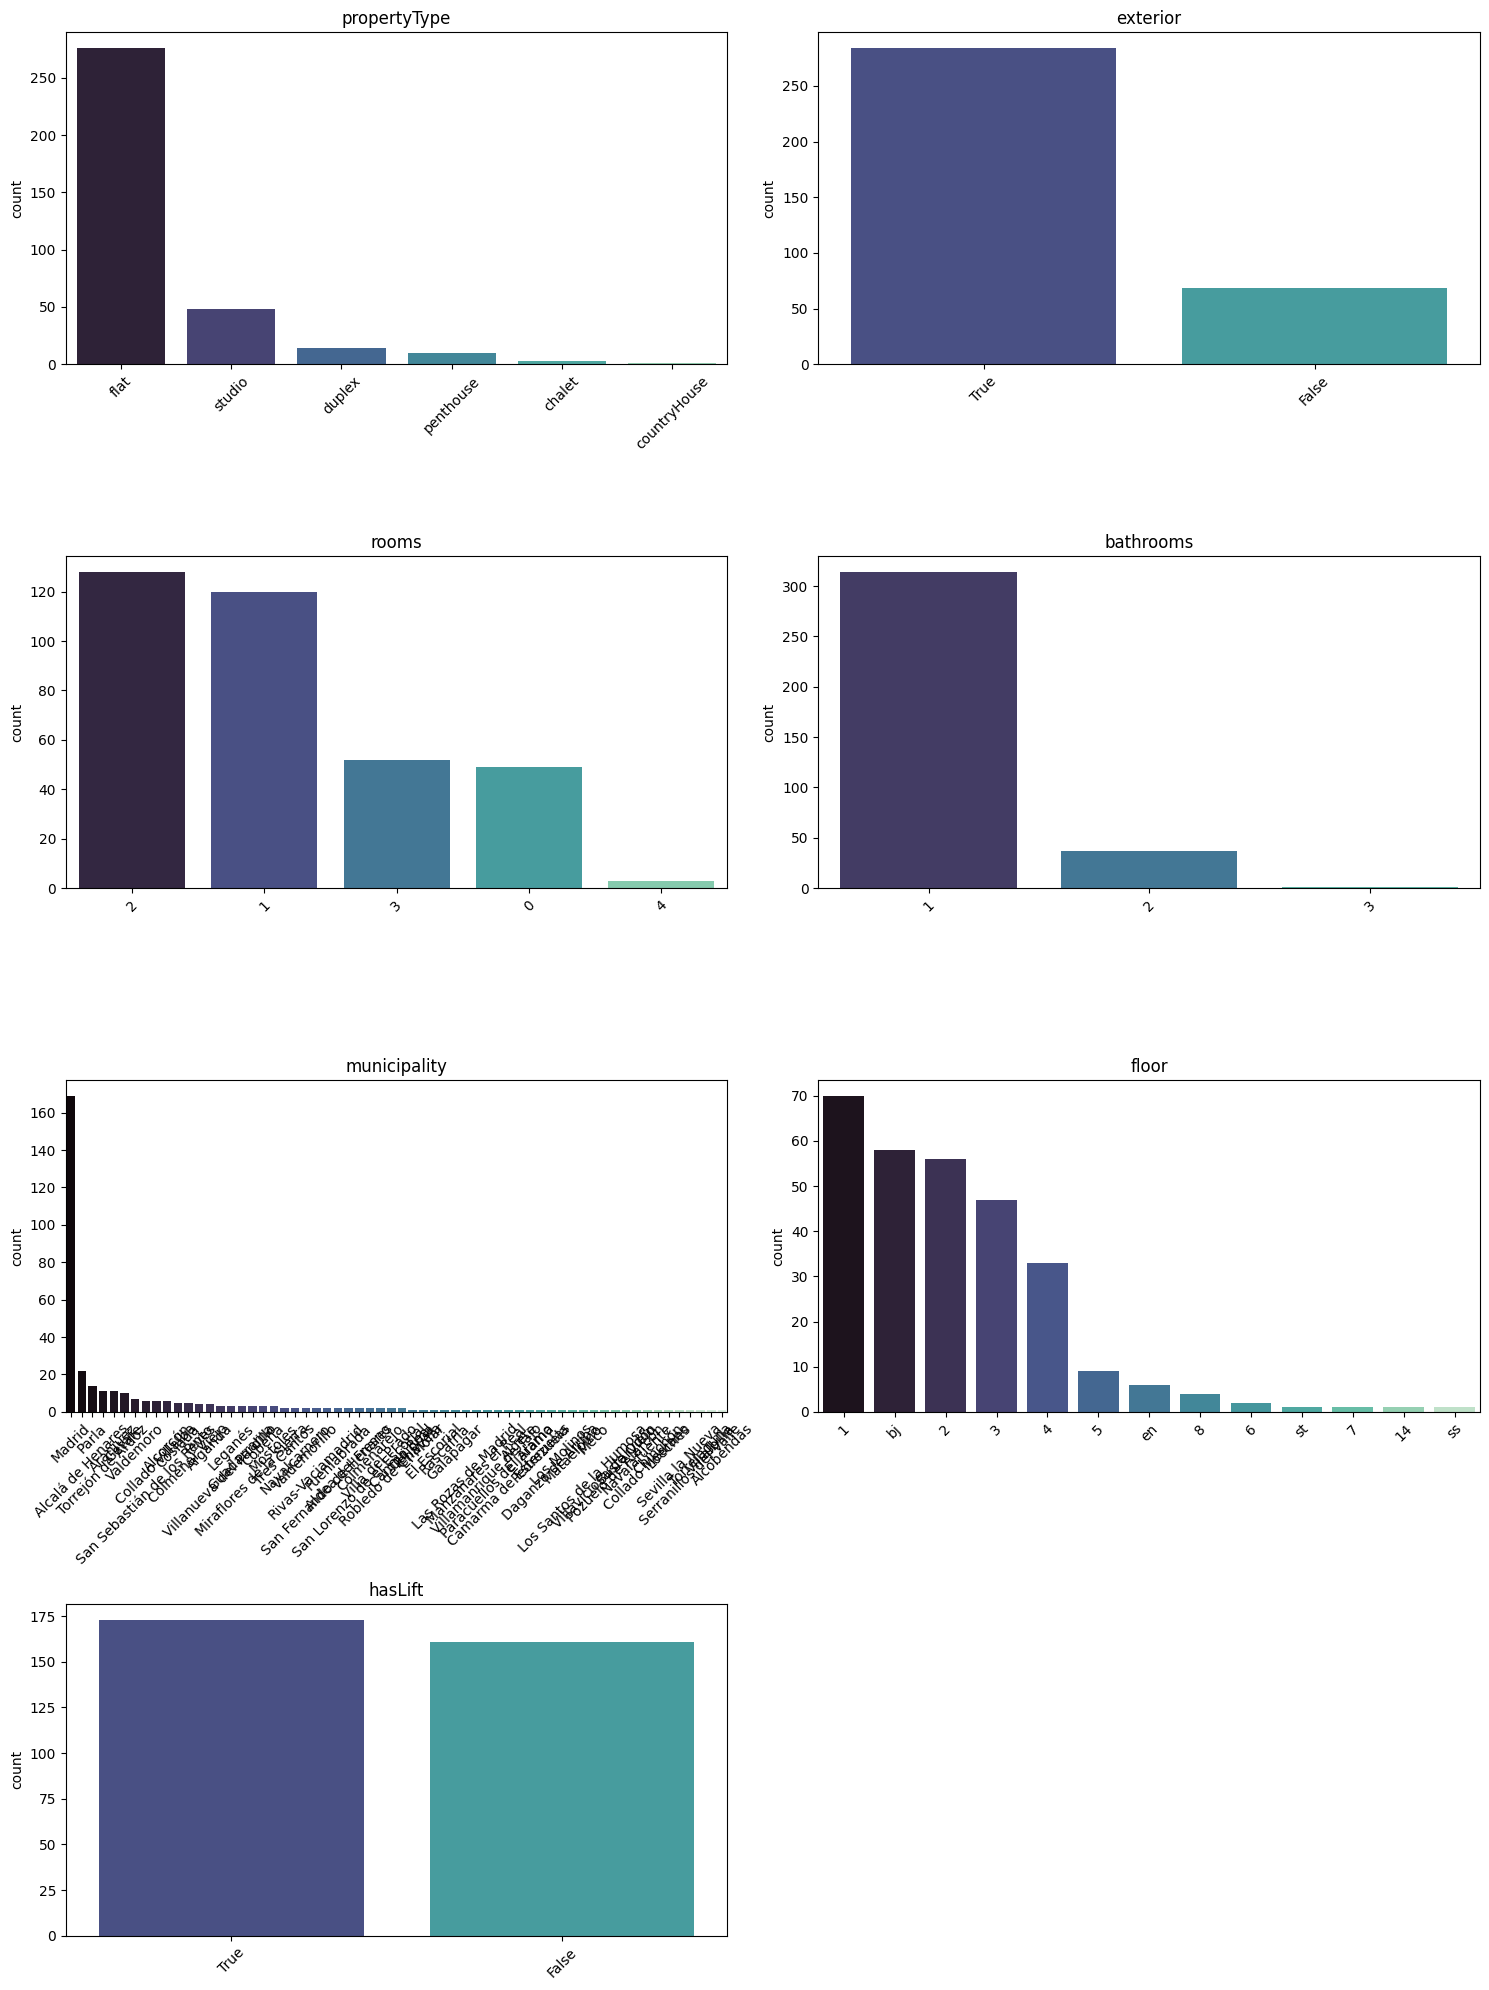

In [13]:
fs.plot_categoricas(df_cat)

La gráfica más impactante es la de municipios donde la mayor parte de los datos está en Madrid y del resto hay muy pocos datos. Lo que nos pone en alerta ya que si llega una casa de un barrio que no sea Madrid igual la predicción es peor y habría que eliminar esta columna ⚠️

### 2. Visualizar la relación de las numéricas y categóricas con la variable respuesta.

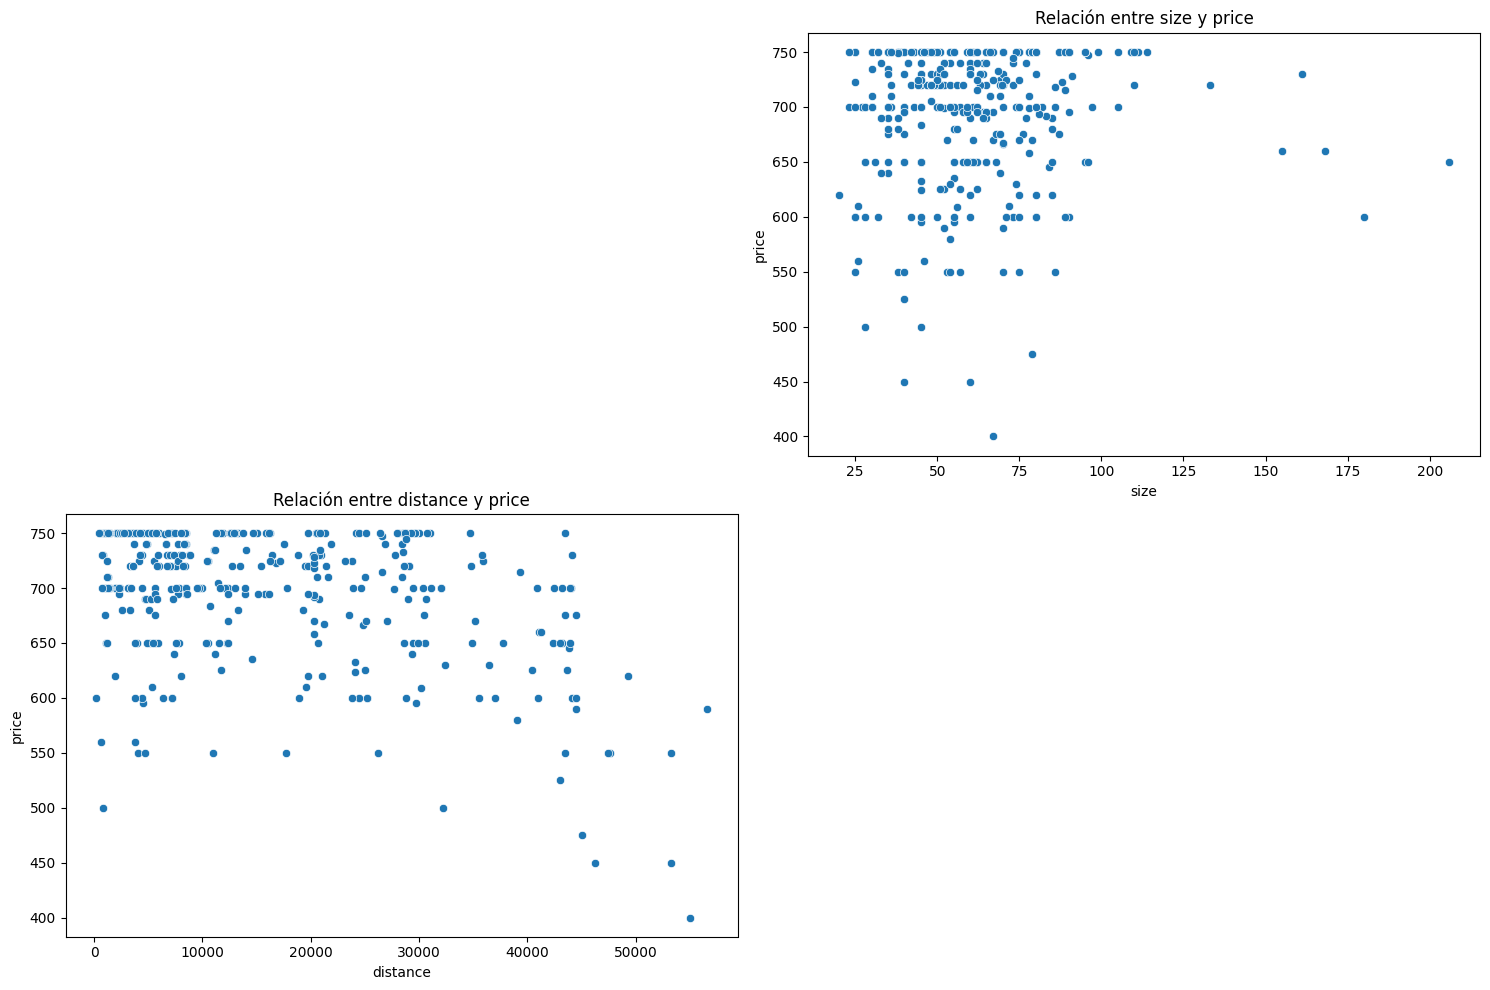

In [14]:
fs.relacion_vr_numericas(df_madrid, "price")

El precio en relación a los metros cuadrados no parece seguir ningún patrón. Es verdad que en los últimos años hay mayor demanda de cadas pequeñas/medianas lo que explica que se demanden sobre todo casas de entre 25 y 100 metros cuadrados y aña mucha variedad de pisos dependiendo de la zona o el número de habitaciones.

En cuanto a la distancia al centro, se esperaba que a mayor distancia menor precio, sin embargo, hasta los 40000 metros del centro los precios varían entre 500 y 750 y a partir de los 40000 parecen tener precios más bajos. Evidentemente la distancia es un factor relevante pero también tendriamos que tener otras columnas en cuenta para entender esta gráfica como el tamaño de la casa, el barrio, el número de habitaciones...etc. Por ejemplo, una casa en la Moraleja está lejos del centro pero ya son chalts, casas más grandes y por lo tanto más caras.

### 3. Correlación entre variables numéricas

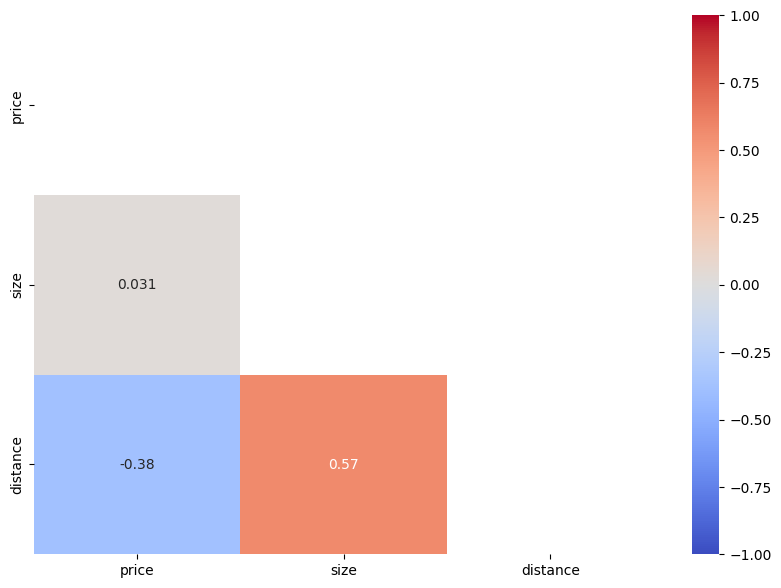

In [15]:
fs.heatmap_correlacion(df_madrid)

Como hemos visto la correlación de precio con tamaño y distancia es baja. La correlación de precio y distancia es negativa y baja, negativa porque a mayor distancia menor precio y baja por lo que hemos comentado en la gráfica anterior. Entre precio y tamaño es positiva ya que a mayor tamaño mayor precio pero es muy insignificante como se observó de nuevo en la gráfica anterior con la alta demanda de casas medias. 

Entre tamaño y distancia parece haber una correlación mayor, a mayor distancia mayor tamaño lo cual tiene bastante sentido porque cuanto más nos alejamos de Madrid centro más espacio tienen las casas como los chalets.

### 4. Outliers

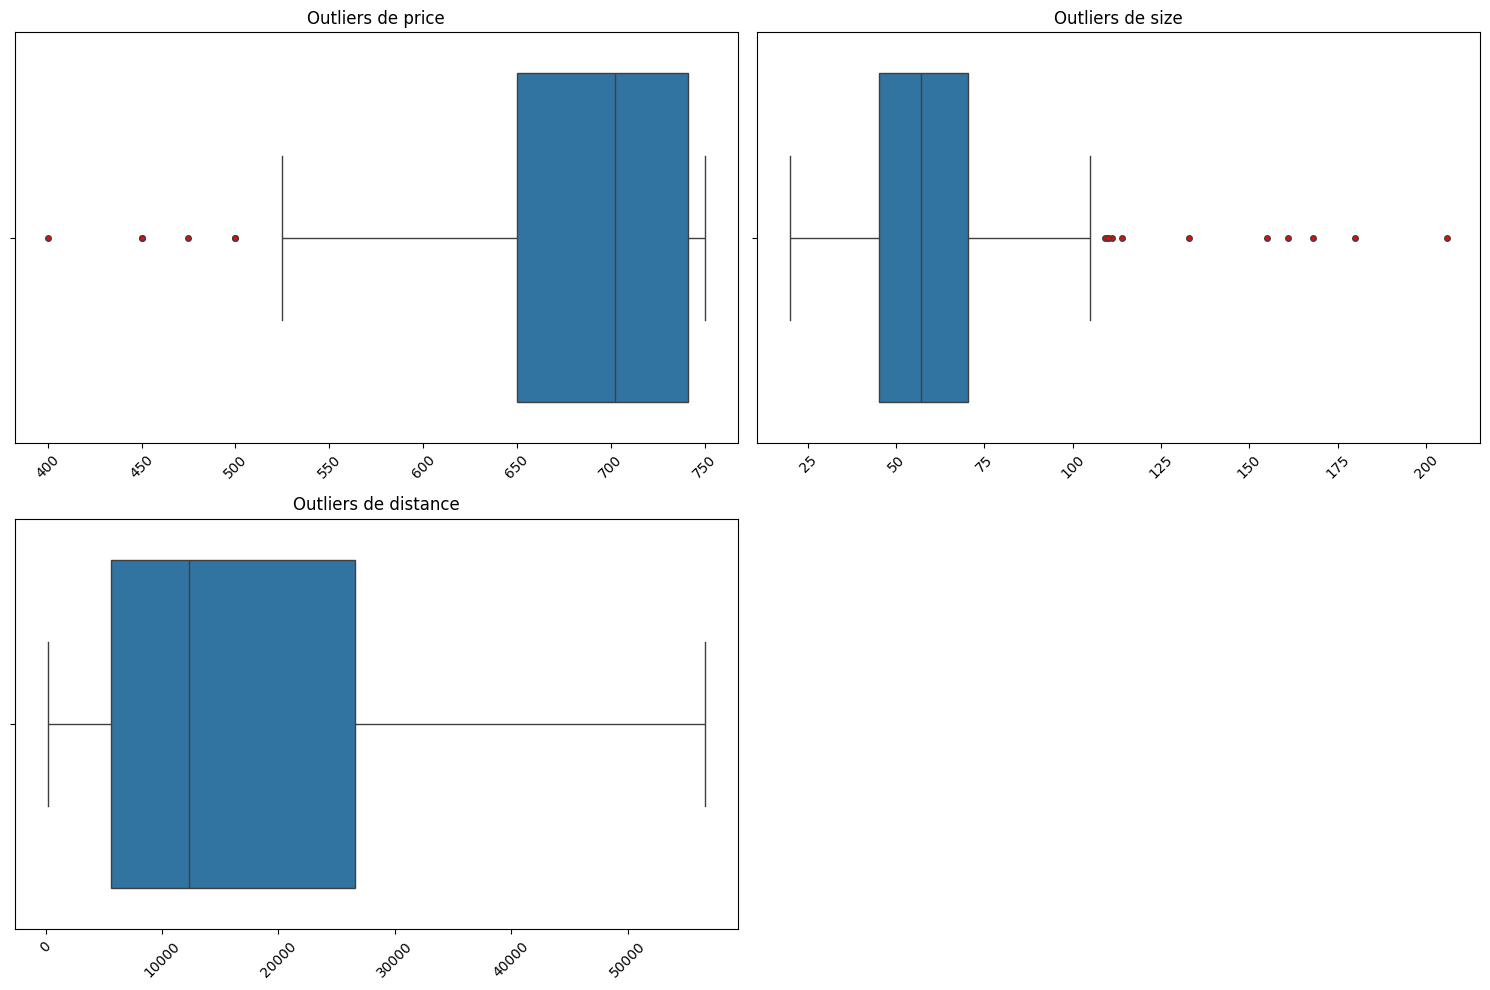

In [16]:
fs.detectar_outliers(df_madrid)

Los outliers de de precio no nos sorprenden ya que como hemos visto anteiormente la mayor parte de las casas se mueven entre los 500 y los 750 por lo que habría que estudiar que hacer con estos outliers, si mantenerlos, eliminarlos o gestionarlos.

Los outliers del tamaño tampoco son sorprendentes ya que como vimos en el punto 1 de visualizaciones el mayor groso de las casas estaban entre los 25 y los 100 metros cuadrados. Habrá que ver como gestionar esos nulos.

En cuanto a la distancia parece no haber ningún outlier.

# **Gestión de nulos**

Todos los datos tienen sentido, las métricas también tienen sentido. Solo faltaría gestionar los nulos.

In [17]:
fgn.imputar_nulos_categoricos(df_madrid, ["floor", "hasLift"], "sin informacion")

In [18]:
df_madrid.isna().sum()

price           0
propertyType    0
size            0
exterior        0
rooms           0
bathrooms       0
municipality    0
distance        0
floor           0
hasLift         0
dtype: int64

In [19]:
df_madrid.to_csv("../datos/df_madrid_nonulls.csv")